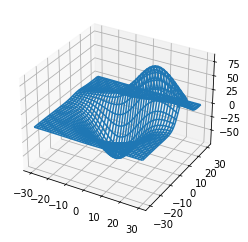

In [1]:
# 3Dグラフの描画

%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

fig = plt.figure()                   # Figureを生成
ax = fig.add_subplot(111,            # 1行×1列の1番目のグリッドにAxesを追加
                     projection='3d' # 3次元の投影面
                    )

# テスト用のデータを取得
X, Y, Z = axes3d.get_test_data()

# 3Dワイヤーフレームをプロット
ax.plot_wireframe(X, Y, Z)

plt.show()

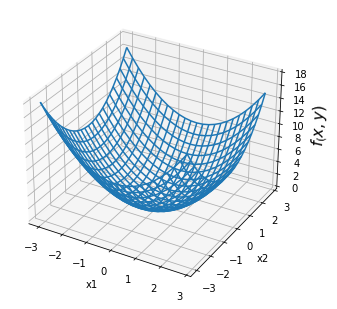

In [2]:
# f(x,y)=x^2+y^2の3Dグラフをプロットする
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

def func(x,                  # int: f(x,y)のxの値
         y                   # int: f(x,y)のyの値
         ):
    '''
    3次元グラフで使用する関数

    '''
    return x**2 + y**2       # float: f(x, y)=x^2 + y^2


x1 = np.arange(-3, 3, 0.25)  # x_1軸を生成
x2 = np.arange(-3, 3, 0.25)  # x_2軸を生成
X, Y = np.meshgrid(x1, x2)   # 2次元の格子座標を生成
Z = func(X, Y)               # 関数f(x, y)に配列X,Yを代入し、-3から
                             # 3までの0.25刻みのZ値のリストを取得

fig = plt.figure()           # Figureを生成
ax = axes3d.Axes3D(fig)      # Axes3Dオブジェクトを配置する
ax.set_xlabel("x1")          # x1の軸ラベル
ax.set_ylabel("x2")          # x2の軸ラベル
ax.set_zlabel(r"$f_(x, y)$", size=15)    # f(x1,x2)の軸ラベル
ax.plot_wireframe(X,Y,Z)     # x1、x2、 f(x1,x2)の曲線をプロット

plt.show()

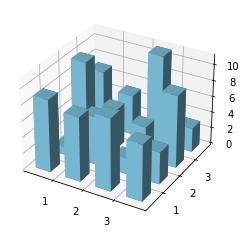

In [3]:
# 2Dのヒストグラムを3D化してプロットする
%matplotlib inline
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import numpy as np

# 乱数生成時のシード(種)を固定
np.random.seed(1)
# 一様乱数 (0.0 – 1.0) の間のランダムな数値を
# 2行×100列で出力し、4倍してx,yに代入
x, y = np.random.rand(2, 100) * 4
# 2次元のヒストグラムを計算する
hist, xedges, yedges = np.histogram2d(
    x,       # x値の配列
    y,       # y値の配列
    bins=4,  # 2つの次元(x,y)それぞれのビンの数
    range=[[0, 4], [0, 4]] # 2つの次元それぞれのビンの左端と右端
)

# 16本のバーのアンカー(配置するときの基準座標)を作成
# 2次元の格子座標を生成
xpos, ypos = np.meshgrid(xedges[:-1] + 0.25,
                         yedges[:-1] + 0.25)
xpos = xpos.flatten('F')   # 2次元配列を列優先'F'で1次元配列に変換
ypos = ypos.flatten('F')   # 2次元配列を列優先'F'で1次元配列に変換
zpos = np.zeros_like(xpos) # xposと同じ形状のゼロ配列を生成

# 16本のバーの幅、奥行き、高さを作成
# zposと同じ形状の要素が0.5の配列を生成
dx = 0.5 * np.ones_like(zpos)
# dxをdyにコピー
dy = dx.copy()
# 2次元配列histを行優先'C'で1次元配列に変換
dz = hist.flatten('C')

# Figureを生成
fig = plt.figure()
# Axes3Dを配置
ax = fig.add_subplot(111, projection='3d')

ax.bar3d(xpos, # xのアンカーポイント
         ypos, # yのアンカーポイント
         zpos, # zのアンカーポイント
         dx,   # バーの幅
         dy,   # バーの奥行
         dz,   # バーの高さ
         color='skyblue',  # バーのカラー
         zsort='average'   # z軸を平均値でソートする
        )

plt.show()